# SVM (Support Vector Machine) is an algorithm used for classification.

# Import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport


# Read data

In [2]:
# Training data
X_train = pd.read_csv("Dataset/Train/X_train.txt", sep = " ", header = None)
y_train = pd.read_csv("Dataset/Train/y_train.txt", sep = " ", header = None)

# Testing data
X_test = pd.read_csv("Dataset/Test/X_test.txt", sep = " ", header = None)
y_test = pd.read_csv("Dataset/Test/y_test.txt", sep = " ", header = None)

# Activity labels
y_labels = pd.read_csv("Dataset/activity_labels.txt", header = None)
classes = y_labels[0]

# Feature labels
features = pd.read_csv("Dataset/features.txt", header = None)

scores = {}


In [3]:
classes

0      1 WALKING           
1      2 WALKING_UPSTAIRS  
2      3 WALKING_DOWNSTAIRS
3      4 SITTING           
4      5 STANDING          
5      6 LAYING            
6      7 STAND_TO_SIT      
7      8 SIT_TO_STAND      
8      9 SIT_TO_LIE        
9     10 LIE_TO_SIT        
10    11 STAND_TO_LIE      
11    12 LIE_TO_STAND      
Name: 0, dtype: object

# GridSearch estimator

In [4]:
# cross-validated grid-search over a parameter grid
# Create the GridSearch estimator along with a parameter object containing the values to adjust
# from sklearn.model_selection import GridSearchCV
# param_grid = {'C': [1, 5, 10, 50],
#               'gamma': [0.0001, 0.0005, 0.001, 0.005],}
# grid = GridSearchCV(model, param_grid, verbose=3, refit=True)
# # Fit the model using the grid search estimator. 
# # This will take the SVC model and try each combination of parameters
# grid.fit(X_train, y_train.values.ravel())

In [5]:
# # List the best parameters for this dataset
# print(grid.best_params_)
# # List the best score
# print(grid.best_score_)

# Linear kernel is used for linear problems.

In [6]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
# Fit to the training data and validate with the test data
svm_linear = SVC(kernel='linear')
svm_linear.fit(pd.DataFrame(X_train), y_train.values.ravel())
predictions = svm_linear.predict(X_test)
# Model Accuracy
print('Training Accuracy: %.3f' % svm_linear.score(X_train, y_train))
print('Test Accuracy: %.3f' % svm_linear.score(X_test, y_test))

Training Accuracy: 0.993
Test Accuracy: 0.952


              precision    recall  f1-score   support

           1       0.96      0.99      0.98       496
           2       0.98      0.97      0.97       471
           3       0.99      0.98      0.98       420
           4       0.96      0.89      0.92       508
           5       0.91      0.97      0.94       556
           6       1.00      1.00      1.00       545
           7       0.95      0.78      0.86        23
           8       0.91      1.00      0.95        10
           9       0.58      0.66      0.62        32
          10       0.75      0.72      0.73        25
          11       0.70      0.65      0.67        49
          12       0.72      0.67      0.69        27

   micro avg       0.95      0.95      0.95      3162
   macro avg       0.87      0.86      0.86      3162
weighted avg       0.95      0.95      0.95      3162



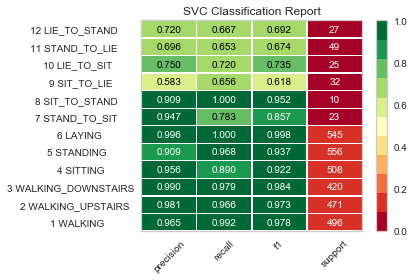

In [8]:
# Calculate classification report
print(classification_report(y_test, predictions))

classes = y_labels[0]
visualizer = ClassificationReport(svm_linear, support=True, classes = classes, cmap="RdYlGn")
visualizer.fit(X_train, y_train.values.ravel())
visualizer.score(X_test, y_test)
visualizer.poof()
f1 = f1_score(y_test, predictions, average='micro')
scores.update({'SVM Linear': f1})


# RBF (Radial Basis Function) kernel is used for non-linear problems. 

In [9]:
# Fit to the training data and validate with the test data
svm_rbf = SVC(kernel='rbf', gamma='scale')
svm_rbf.fit(pd.DataFrame(X_train), y_train.values.ravel())
predictions = svm_rbf.predict(X_test)
# Model Accuracy
print('Training Accuracy: %.3f' % svm_rbf.score(X_train, y_train))
print('Test Accuracy: %.3f' % svm_rbf.score(X_test, y_test))

Training Accuracy: 0.963
Test Accuracy: 0.928


              precision    recall  f1-score   support

           1       0.94      0.99      0.97       496
           2       0.92      0.96      0.94       471
           3       0.99      0.91      0.95       420
           4       0.91      0.87      0.89       508
           5       0.89      0.93      0.91       556
           6       1.00      1.00      1.00       545
           7       0.89      0.70      0.78        23
           8       1.00      0.80      0.89        10
           9       0.62      0.72      0.67        32
          10       0.60      0.72      0.65        25
          11       0.71      0.55      0.62        49
          12       0.67      0.44      0.53        27

   micro avg       0.93      0.93      0.93      3162
   macro avg       0.84      0.80      0.82      3162
weighted avg       0.93      0.93      0.93      3162



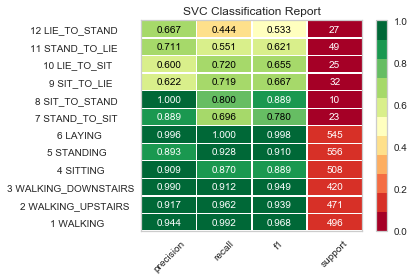

In [11]:
# Calculate classification report
print(classification_report(y_test, predictions))

classes = y_labels[0]
visualizer = ClassificationReport(svm_rbf, support=True, classes=classes, cmap="RdYlGn")
visualizer.fit(X_train, y_train.values.ravel())
visualizer.score(X_test, y_test)
visualizer.poof()
f1 = f1_score(y_test, predictions, average='micro')
scores.update({'SVM RBF': f1})


# Sigmoid kernel is used for non-linear separation.

In [12]:
# Fit to the training data and validate with the test data
svm_sigmoid = SVC(kernel='sigmoid', gamma='scale')
svm_sigmoid.fit(pd.DataFrame(X_train), y_train.values.ravel())
predictions = svm_sigmoid.predict(X_test)
# Model Accuracy
print('Training Accuracy: %.3f' % svm_sigmoid.score(X_train, y_train))
print('Test Accuracy: %.3f' % svm_sigmoid.score(X_test, y_test))

Training Accuracy: 0.901
Test Accuracy: 0.881


              precision    recall  f1-score   support

           1       0.92      0.99      0.95       496
           2       0.88      0.95      0.91       471
           3       0.98      0.88      0.93       420
           4       0.87      0.73      0.79       508
           5       0.78      0.91      0.84       556
           6       1.00      1.00      1.00       545
           7       0.40      0.09      0.14        23
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        32
          10       0.50      0.96      0.66        25
          11       0.48      0.71      0.57        49
          12       0.00      0.00      0.00        27

   micro avg       0.88      0.88      0.88      3162
   macro avg       0.57      0.60      0.57      3162
weighted avg       0.87      0.88      0.87      3162



/Users/Danielle/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Danielle/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


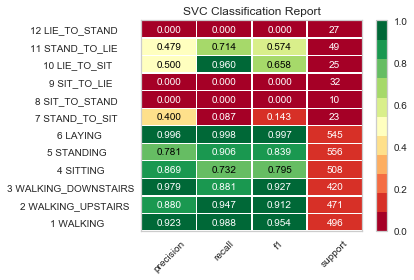

In [13]:
# Calculate classification report
print(classification_report(y_test, predictions))

classes = y_labels[0]
visualizer = ClassificationReport(svm_sigmoid, support=True, classes=classes, cmap="RdYlGn")
visualizer.fit(X_train, y_train.values.ravel())
visualizer.score(X_test, y_test)
visualizer.poof()
f1 = f1_score(y_test, predictions, average='micro')
scores.update({'SVM Sigmoid': f1})


In [14]:
scores

{'SVM Linear': 0.9519291587602783,
 'SVM RBF': 0.9282099936748893,
 'SVM Sigmoid': 0.881404174573055}

Text(0.5, 0, 'SVM Kernels')

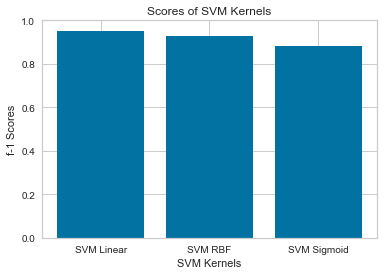

In [27]:
plt.bar(scores.keys(), scores.values())
plt.title('Scores of SVM Kernels')
plt.ylabel('f-1 Scores')
plt.xlabel('SVM Kernels')
